# 본 내용은 인프런의 강의명(딥러닝 CNN 완벽 가이드 - Fundamental 편)를 듣고 요약했습니다.
+ 이미지를 함부로 가져가지 말아주세요

## 컨볼루션 적용 시 출력 피처맵의 크기 계산 공식 이해
+ I는 입력 Feature Map의 크기, F는 Filter의 크기(Kernel size), P는 Padding(정수), S는 Strides(정수)
+ 피처맵 계산 공식: O = (I - F + 2P)/S +1
+ padding='same'은 1
+ padding='valid'는 0

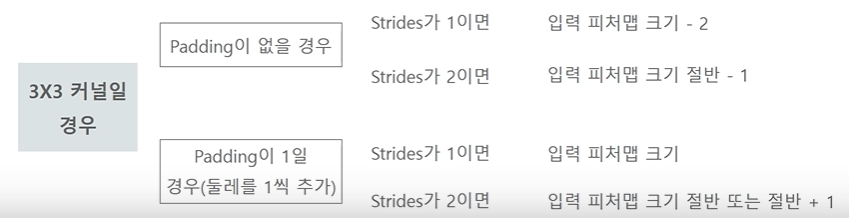

+ 최근의 CNN은 대부분 3X3 커널을 사용
+ 대칭성을 위해서 커널 크기는 홀수(3x3, 5x5, 7x7)

## Stride가 1이고 padding이 없는 경우

+ O = (I - F + 2P)/S +1 = (5 - 3 + 0)/1 + 1 = 3

In [4]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

input_tensor = Input(shape=(5,5,1))
x = Conv2D(filters=1, kernel_size=3, strides=1)(input_tensor)
print('x.shape: ', x.shape)

x.shape:  (None, 3, 3, 1)


## Stride가 1이고 Padding이 1인 경우

In [5]:
input_tensor = Input(shape=(5,5,1))
x = Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(input_tensor)
print('x.shape', x.shape)

x.shape (None, 5, 5, 1)


## 수동으로 padding을 입력
+ ZeroPadding2D layer를 이용하여 padding을 수동으로 적용

In [6]:
from tensorflow.keras.layers import ZeroPadding2D

input_tensor = Input(shape=(5,5,1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
# padded_input = ZeroPadding2D(padding=((1,1),(1,1)))(input_tensor)
print('shape after padding:', padded_input.shape)
x = Conv2D(filters=1, kernel_size=3, strides=1)(padded_input)
print('x.shape:', x.shape)

shape after padding: (None, 7, 7, 1)
x.shape: (None, 5, 5, 1)


## Stride가 2이고 Padding이 없는 경우
+ O = (I - F + 2P)/S +1 = (5 - 3 + 0)/2 + 1 = 2

In [8]:
input_tensor = Input(shape=(5,5,1))
x = Conv2D(filters=1, kernel_size=3, strides=2)(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 2, 2, 1)


## Stride가 2이고 Padding은 1 적용

In [9]:
input_tensor = Input(shape=(5, 5, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
print('shape after padding:', padded_input.shape)
x = Conv2D(filters=1, kernel_size=3, strides=2)(padded_input)
print('x.shape:', x.shape)

shape after padding: (None, 7, 7, 1)
x.shape: (None, 3, 3, 1)


### Strides 2를 적용시 주의해야할 경우
+ (6 - 3 + 0)/2 + 1 = 2.5??
+ 그러나, 결과는 2가 나온다.
+ 문제점은 마지막 열과 마지막 행이 계산이 안됨.

### 예시 1)

In [11]:
input_tensor = Input(shape=(6,6,1))
x = Conv2D(filters=1, kernel_size=3, strides=2)(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 2, 2, 1)


### 예시 2)
+ padding ='same' 적용 시, 끝까지 갈 수 있게 알아서 계산을 해준다.

In [12]:
input_tensor = Input(shape=(6,6,1))
x = Conv2D(filters=1, kernel_size=3, strides=2, padding='same')(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 3, 3, 1)


In [14]:
input_tensor = Input(shape=(6,6,1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
x = Conv2D(filters=1, kernel_size=3, strides=2, padding='valid')(padded_input)
print('x.shape:', x.shape)

x.shape: (None, 3, 3, 1)


If tuple of 2 tuples of 2 ints:
      interpreted as
      `((top_pad, bottom_pad), (left_pad, right_pad))

padding=((1,0),(1,0))은 위쪽과 왼쪽에만 한 줄씩 추가한다

In [15]:
input_tensor = Input(shape=(6, 6, 1))
padded_input = ZeroPadding2D(padding=((1, 0),(1, 0)))(input_tensor)
x = Conv2D(filters=1, kernel_size=3, strides=2)(padded_input)
print('x.shpae:', x.shape)

x.shpae: (None, 3, 3, 1)


## Maxpooling 적용

In [18]:
input_tensor = Input(shape=(224, 224, 1))
x = MaxPooling2D(2)(input_tensor)
print('x.shape:',x.shape)

x.shape: (None, 112, 112, 1)


홀수인 경우, 소수점을 없애버린다.

In [19]:
input_tensor = Input(shape=(223, 223, 1))
x = MaxPooling2D(2)(input_tensor)
print('x.shape:',x.shape)

x.shape: (None, 111, 111, 1)
